In [ ]:
# Linear regression in one variable using gradient descent (alog with regularization)

In [1]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [12]:
data = pd.read_csv('Housing.csv')
area = data['area']
price = data['price']

print(area)
print(price)

a_m = np.mean(area)
p_m = np.mean(price)
print(a_m)
print(p_m)

area_scale = list(map(lambda x: (x)/1000, area))
price_scale = list(map(lambda x: (x)/100000, price))

x_train = np.array(area_scale)
y_train = np.array(price_scale)

print(x_train)
print(y_train)

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64
0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64
5150.54128440367
4766729.247706422
[ 7.42   8.96   9.96   7.5    7.42   7.5    8.58  16.2    8.1    5.75
 13.2    6.     6.55   3.5    7.8    6.     6.6    8.5    4.6    6.42
  4.32   7.155  8.05   4.56   8.8    6.54   6.     8.875  7.95   5.5
  7.475  7.     4.88   5.96   6.84   7.     7.482  9.     6.     6.
  6.55   6.36   6.48   6.     6.     6.     6.     6.6    4.3    7.44
  7.44   6.325  6.     5.15   6.     6.    11.44   9.     7.68   6.
  6.     8.88   6.24   6.36  11.175  8.88  13.2    7.7    6.    12.09
  4.     6.     5.02   6.6    4.04   4.26   6.42   6.5    5.7    6.
  6.     4.    10.5    6.  

In [3]:
# L regularization
# def compute_cost (x,y,w,b):
#     m=len(x)
#     cost=0
#     for i in range(m):
#         f_wb = w * x[i] + b
#         cost = cost + (f_wb - y[i])**2
#     total_cost = 1 / (2 * m) * cost
#     return total_cost


# L1 regularization
# def compute_cost (x,y,w,b):
#     m=len(x)
#     reg_p=0.1
#     cost=0
#     norm=0
#     for i in range(m):
#         f_wb = w * x[i] + b
#         cost = cost + (f_wb - y[i])**2
#     norm = abs(w)
#     total_cost = 1 / (2 * m) * (cost + (reg_p * norm))
#     return total_cost


# L2 regularization
def compute_cost (x,y,w,b):
    m=len(x)
    reg_p=0.1
    cost=0
    norm=0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    norm = w*w
    total_cost = 1 / (2 * m) * (cost + (reg_p * norm))
    return total_cost


In [4]:
# L regularization
# def compute_gradient(x,y,w,b):
#     m = x.shape[0]    
#     dj_dw = 0
#     dj_db = 0
#     for i in range(m):  
#         f_wb = w * x[i] + b 
#         dj_dw_i = (f_wb - y[i]) * x[i] 
#         dj_db_i = f_wb - y[i] 
#         dj_dw = dj_dw + dj_dw_i 
#         dj_db = dj_db + dj_db_i
#     dj_dw = dj_dw / m 
#     dj_db = dj_db / m 
#     return dj_dw, dj_db


# L1 regularization
# def compute_gradient(x,y,w,b):
#     m = x.shape[0]    
#     dj_dw = 0
#     dj_db = 0

#     if w>0:
#         reg_p = 0.1
#     else:
#         reg_p = -0.1
    
#     for i in range(m):  
#         f_wb = w * x[i] + b 
#         dj_dw_i = (f_wb - y[i]) * x[i] 
#         dj_db_i = f_wb - y[i] 
#         dj_dw = dj_dw + dj_dw_i 
#         dj_db = dj_db + dj_db_i
#     dj_dw = (dj_dw + reg_p) / m 
#     dj_db = dj_db / m 
#     return dj_dw, dj_db


# L2 regularization
def compute_gradient(x,y,w,b):
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0

    reg_p = 0.1
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_dw = dj_dw + dj_dw_i 
        dj_db = dj_db + dj_db_i
    dj_dw = (dj_dw + (reg_p*w)) / m 
    dj_db = dj_db / m 
    return dj_dw, dj_db

In [5]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 

    # An list to store cost 
    # An list to store corresponding w and b
    cost_history = []
    parameter_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w , b)     
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:       
            cost_history.append( cost_function(x, y, w , b))
            parameter_history.append([w,b])

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, cost_history, parameter_history #return w and J,w history for graphing
  

In [6]:
w_init = 0
b_init = 0
iterations = 10000
tmp_alpha = 1.0e-2
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")
    


Iteration    0: Cost 6.92e+02  dj_dw: -2.672e+02, dj_db: -4.767e+01   w:  2.672e+00, b: 4.76673e-01
Iteration 1000: Cost 1.26e+02  dj_dw:  1.260e-01, dj_db: -7.605e-01   w:  5.478e+00, b: 1.86916e+01
Iteration 2000: Cost 1.25e+02  dj_dw:  2.908e-02, dj_db: -1.755e-01   w:  4.818e+00, b: 2.26781e+01
Iteration 3000: Cost 1.24e+02  dj_dw:  6.711e-03, dj_db: -4.050e-02   w:  4.665e+00, b: 2.35980e+01
Iteration 4000: Cost 1.24e+02  dj_dw:  1.549e-03, dj_db: -9.345e-03   w:  4.630e+00, b: 2.38103e+01
Iteration 5000: Cost 1.24e+02  dj_dw:  3.573e-04, dj_db: -2.156e-03   w:  4.622e+00, b: 2.38593e+01
Iteration 6000: Cost 1.24e+02  dj_dw:  8.246e-05, dj_db: -4.976e-04   w:  4.620e+00, b: 2.38706e+01
Iteration 7000: Cost 1.24e+02  dj_dw:  1.903e-05, dj_db: -1.148e-04   w:  4.620e+00, b: 2.38732e+01
Iteration 8000: Cost 1.24e+02  dj_dw:  4.391e-06, dj_db: -2.650e-05   w:  4.620e+00, b: 2.38738e+01
Iteration 9000: Cost 1.24e+02  dj_dw:  1.013e-06, dj_db: -6.115e-06   w:  4.620e+00, b: 2.38740e+01


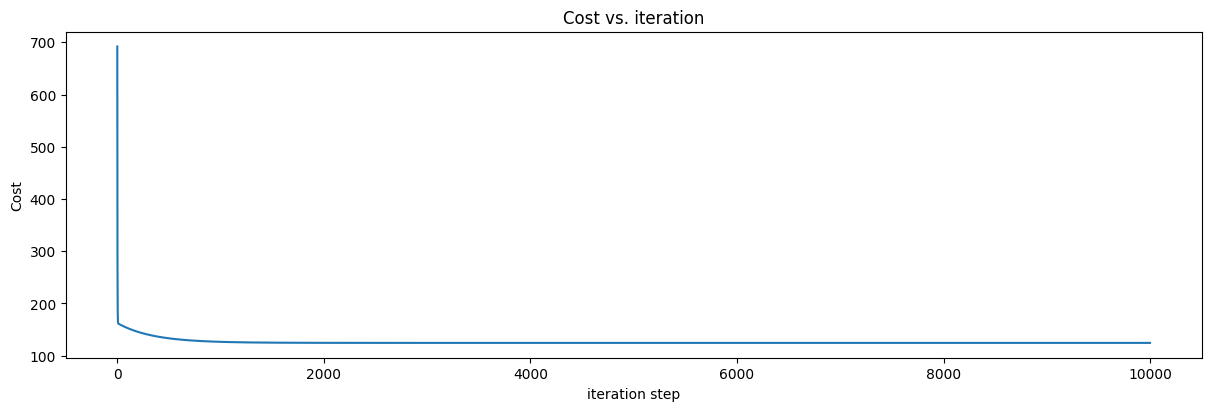

In [7]:
# in one graph
fig, ax = plt.subplots(constrained_layout=True, figsize=(12,4))
ax.plot(np.arange(len(J_hist)), J_hist)
ax.set_title("Cost vs. iteration")
ax.set_ylabel('Cost')
ax.set_xlabel('iteration step')
plt.show()

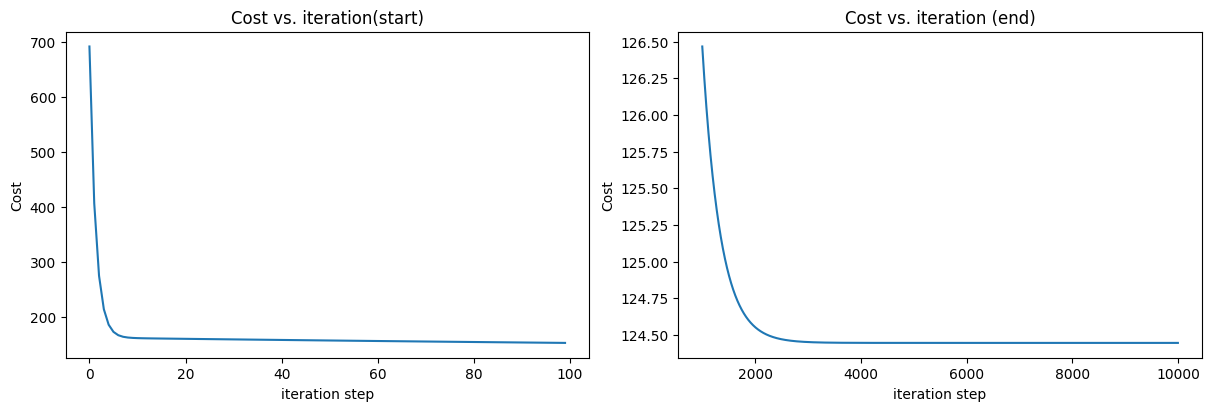

In [8]:
# in two graphs
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

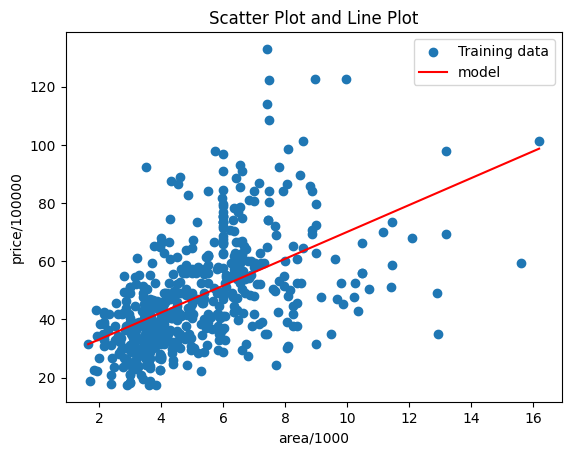

In [9]:
m = w_final
c = b_final

x_line = np.linspace(min(x_train), max(x_train), 100)
y_line = m * x_line + c

plt.scatter(x_train, y_train, label='Training data')
plt.plot(x_line, y_line, color='red', label='model')
plt.xlabel('area/1000')
plt.ylabel('price/100000')
plt.title('Scatter Plot and Line Plot')
plt.legend()

plt.show()


In [11]:
m = w_final
c = b_final
x=float(input("Enter the area ofthe house: "))
y = m * (x/1000) + c
print("predicted price is :",y*100000)

Enter the area ofthe house:  9000


predicted price is : 6545013.593351186
